## Import Libraries and Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



In [2]:
df=pd.read_csv("loan_data.csv")


# Exploratory Data Analysis (EDA)

In [4]:
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [5]:
df.shape

(9578, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# FICO Score Distribution by credit.policy

Text(0.5, 0, 'FICO')

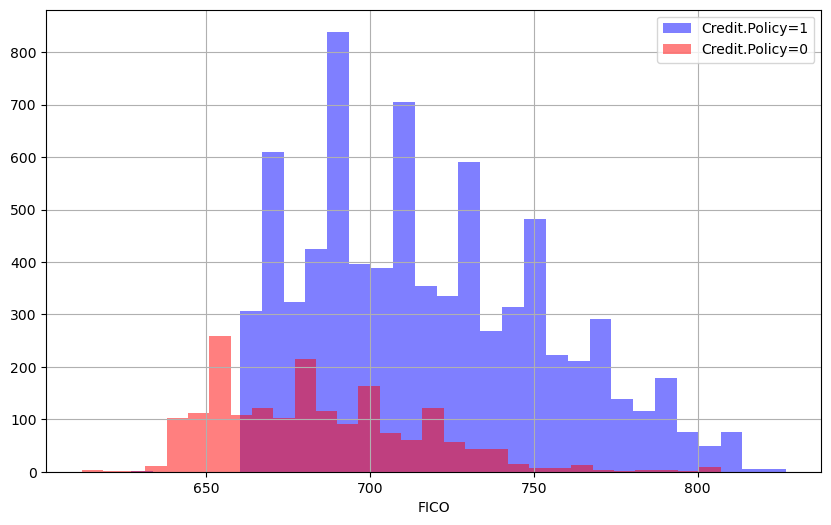

In [17]:
#Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

# FICO Score Distribution by not.fully.paid

<Axes: >

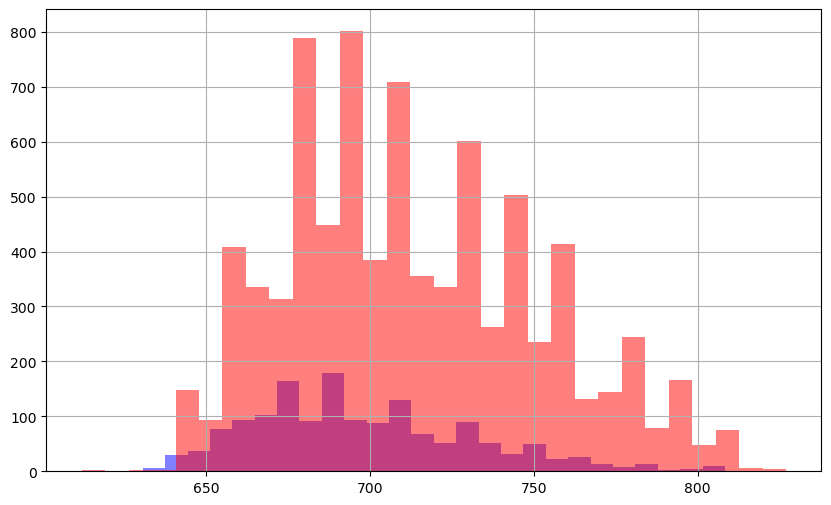

In [20]:
#except this time select by the not.fully.paid column.
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')

# FICO Score vs. Interest Rate

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


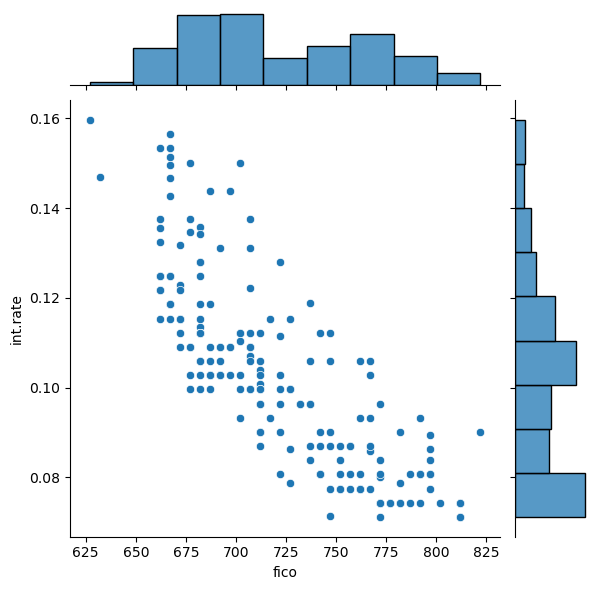

In [23]:
#between FICO score and interest rate
limited_df = df.iloc[:200]
sns.jointplot(data=limited_df, x='fico', y='int.rate')

# FICO vs. Interest Rate by credit.policy and not.fully.paid

<Figure size 1100x700 with 0 Axes>

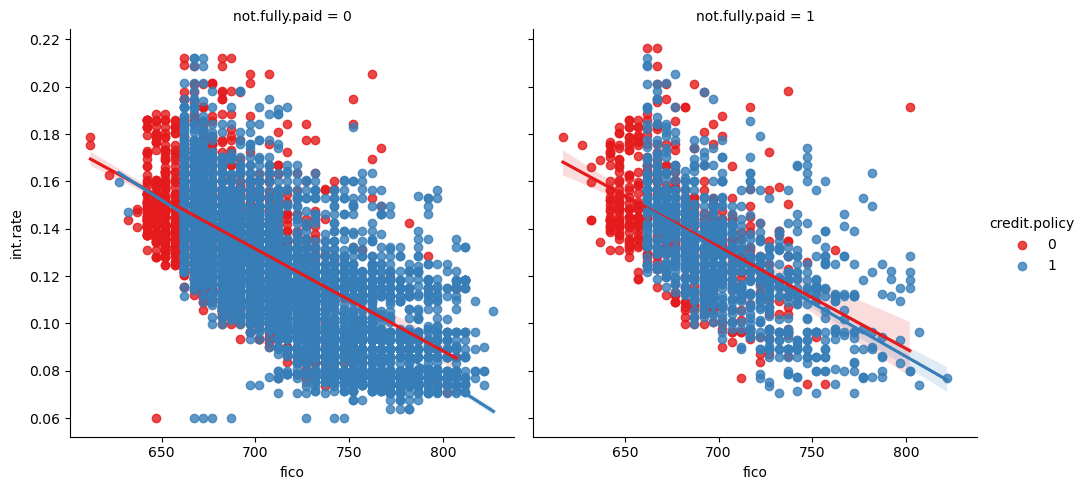

In [26]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')


# Non-numerical to numerical


In [29]:
df = pd.get_dummies(df,columns=["purpose"],drop_first=True,dtype=int)


In [31]:
df.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0


# Prepare Target Variable(Y)

In [34]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [36]:
print(X.columns)

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')


# Model Building

# 1.Split the Data into Training and Test Sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  

In [44]:
X_test_scaled[0].max()

1.0

In [46]:
X_train_scaled[0].min()

0.0

# 2. Train a Base Model

In [49]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled,y_train)
dtree.score(X_test_scaled,y_test)


0.7296450939457203

In [51]:
predictions = dtree.predict(X_test_scaled)
dtree_accuracy=accuracy_score(y_test,predictions)
print(f"Dtree accuracy: {dtree_accuracy}")

Dtree accuracy: 0.7296450939457203


# 2.1 Model Evaluation

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [56]:
print(confusion_matrix(y_test,predictions)) 

[[1996  435]
 [ 342  101]]


# 3. Train a Model

In [59]:
rfc = RandomForestClassifier(n_estimators=600)

In [61]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=600)

In [62]:
rfc.score(X_test_scaled,y_test)

0.8455114822546973

# 3.1 Model Evaluation

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [65]:
print(confusion_matrix(y_test,predictions))

[[1996  435]
 [ 342  101]]


# 3. Train a Model

In [67]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Komşu sayısı
    'weights': ['uniform', 'distance']  # Ağırlık türü
}

In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# 3.1 Model Optimization

In [76]:
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)
print("KNN Best Parameters:", knn_grid_search.best_params_)
print("KNN Best Accuracy:", knn_grid_search.best_score_)

best_knn_model = knn_grid_search.best_estimator_
knn_test_accuracy = best_knn_model.score(X_test_scaled, y_test)
print("KNN Test Set Accuracy:", knn_test_accuracy)

KNN Best Parameters: {'n_neighbors': 15, 'weights': 'distance'}
KNN Best Accuracy: 0.8351732389506605
KNN Test Set Accuracy: 0.8416840640222686


# 3.2  Model Evaluation

In [79]:
y_pred = best_knn_model.predict(X_test_scaled)
# Measure Perform
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8416840640222686


In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [83]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[2398   33]
 [ 422   21]]


In [85]:
best_knn_model.score(X_test_scaled,y_test)

0.8416840640222686

In [87]:
#prediction with existing parameters.
best_knn_model.predict([[1,5,1,5,8,4,6,5,2,4,525,25,1,0,0,1,0,1]])

array([0])

# 4. Train a Model

In [90]:
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'] 
}

In [92]:
logreg = LogisticRegression(max_iter=10000)

# 4.1 Model Optimization 

In [95]:
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [96]:
print("Logistic Regression Best Parameters:", logreg_grid_search.best_params_)
print("Logistic Regression Best Accuracy:", logreg_grid_search.best_score_)

best_logreg_model = logreg_grid_search.best_estimator_
logreg_test_accuracy = best_logreg_model.score(X_test_scaled, y_test)
print("Logistic Regression Test Set Accuracy:", logreg_test_accuracy)

Logistic Regression Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Best Accuracy: 0.8389025788284528
Logistic Regression Test Set Accuracy: 0.8458594293667363


In [97]:
best_logreg_model.score(X_test_scaled, y_test)

0.8458594293667363

# 4.2 Model Evaluation

In [99]:
y_pred_logreg = best_logreg_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8458594293667363


In [100]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.67      0.50      0.47      2874
weighted avg       0.79      0.85      0.78      2874



In [102]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg)) 


Confusion Matrix:
 [[2426    5]
 [ 438    5]]


# Compare models - f1-scores

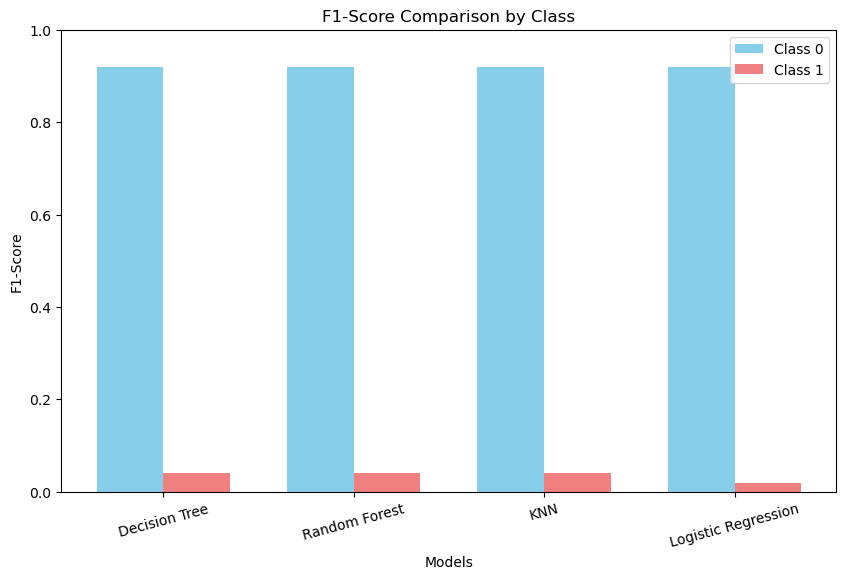

In [109]:
models = ["Decision Tree", "Random Forest", "KNN", "Logistic Regression"]

f1_scores_class_0 = [0.92, 0.92, 0.92, 0.92]  # Örnek değerler (Class 0)
f1_scores_class_1 = [0.04, 0.04, 0.04, 0.02]  # Örnek değerler (Class 1)

x = np.arange(len(models)) 
width = 0.35 

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, f1_scores_class_0, width, label='Class 0', color='skyblue')
plt.bar(x + width/2, f1_scores_class_1, width, label='Class 1', color='lightcoral')

plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.title("F1-Score Comparison by Class")
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.show()


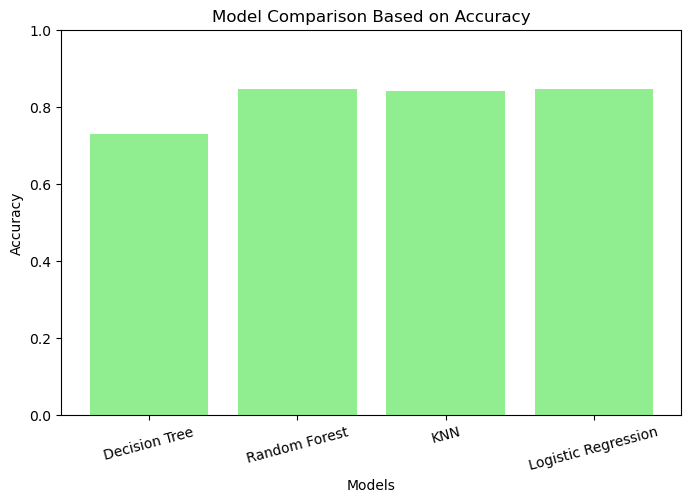

In [111]:
models = ["Decision Tree", "Random Forest", "KNN", "Logistic Regression"]
accuracy_scores = [0.730, 0.847, 0.841, 0.845]
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_scores, color='lightgreen')
plt.ylim(0, 1)
plt.title("Model Comparison Based on Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=15)
plt.show()

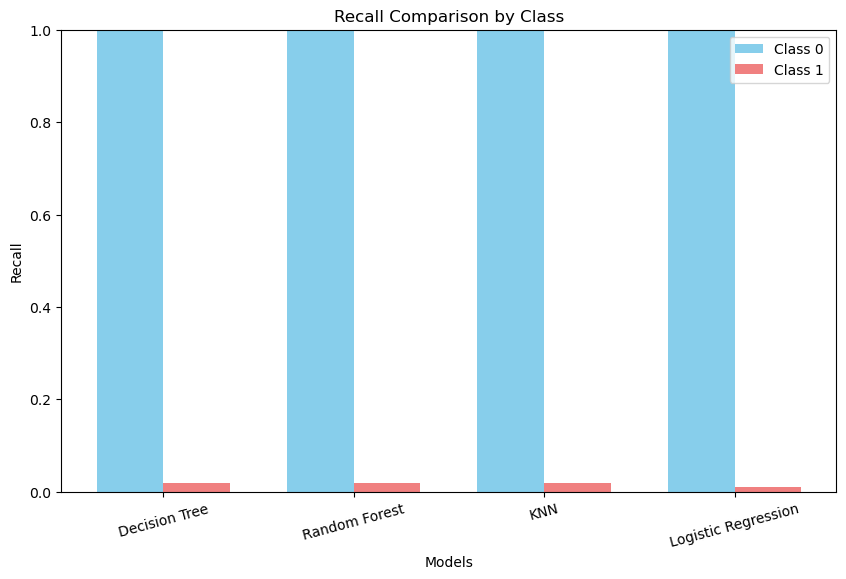

In [113]:
models = ["Decision Tree", "Random Forest", "KNN", "Logistic Regression"]
recall_scores_class_0 = [1.00, 1.00, 1.00, 1.00] 
recall_scores_class_1 = [0.02, 0.02, 0.02, 0.01]  
x = np.arange(len(models)) 
width = 0.35 

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, recall_scores_class_0, width, label='Class 0', color='skyblue')
plt.bar(x + width/2, recall_scores_class_1, width, label='Class 1', color='lightcoral')

plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Recall Comparison by Class")
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.show()
